<a href="https://colab.research.google.com/github/harshrus/LGMVIP-TASK2-DSINTERN/blob/main/LGMVIP_TASK2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LGM VIP
TASK 2 (Intermediate Level Task)

Prediction using Decision Tree Algorithm

AUTHOR : Harsh Rustagi

Aim :
Create the Decision tree classifier and visualize it graphically.

Objective :
The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.
Importing required Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as sm
%matplotlib inline

In [2]:
iris = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")

In [3]:
iris.head(15)

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
5,4.6,3.4,1.4,0.3,Iris-setosa
6,5.0,3.4,1.5,0.2,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
8,4.9,3.1,1.5,0.1,Iris-setosa
9,5.4,3.7,1.5,0.2,Iris-setosa


**Discription of the Iris data**

In [4]:
iris.shape

(149, 5)

In [5]:
iris.describe()

,5.1,3.5,1.4,0.2
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**NULL VALUES**

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [7]:
iris.isnull().sum()


5.1            0
3.5            0
1.4            0
0.2            0
Iris-setosa    0
dtype: int64

**USING LabelEncoder**

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
iris['Iris-setosa']=le.fit_transform(iris['Iris-setosa'])

In [9]:
iris.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0


In [10]:
X=iris.drop(["Iris-setosa"],axis=1)
y=iris["Iris-setosa"]

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [12]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()

In [13]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

**Predicting evaaluating decision tree**

In [14]:
prediction=dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.91      0.77      0.83        13
           2       0.80      0.92      0.86        13

    accuracy                           0.91        45
   macro avg       0.90      0.90      0.90        45
weighted avg       0.92      0.91      0.91        45



In [15]:
print(confusion_matrix(y_test,prediction))


[[19  0  0]
 [ 0 10  3]
 [ 0  1 12]]


In [16]:
print(accuracy_score(y_test,prediction)*100,"%")

91.11111111111111 %


[Text(0.5, 0.875, 'X[2] <= 4.75\ngini = 0.664\nsamples = 104\nvalue = [30, 37, 37]'),
 Text(0.25, 0.625, 'X[3] <= 0.7\ngini = 0.497\nsamples = 65\nvalue = [30, 35, 0]'),
 Text(0.125, 0.375, 'gini = 0.0\nsamples = 30\nvalue = [30, 0, 0]'),
 Text(0.375, 0.375, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(0.75, 0.625, 'X[3] <= 1.65\ngini = 0.097\nsamples = 39\nvalue = [0, 2, 37]'),
 Text(0.625, 0.375, 'X[2] <= 4.95\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.75, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.875, 0.375, 'gini = 0.0\nsamples = 34\nvalue = [0, 0, 34]')]

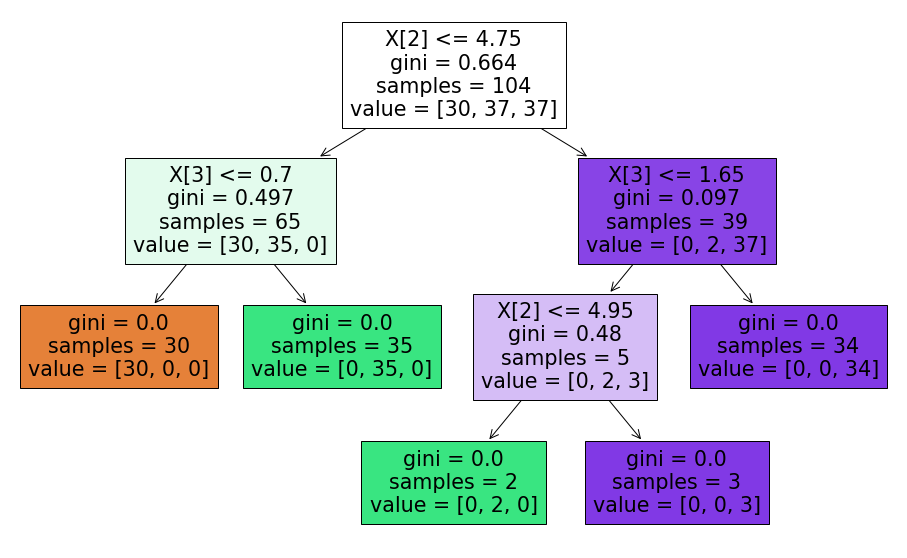

In [17]:
from sklearn import tree
plt.figure(figsize=(16,10))
tree.plot_tree(dtree,filled=True)